In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from sde_lib import *

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('figure', figsize=[10, 8])
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Exit probability as PDE

Consider the SDE
$$
  d X_t = \theta( \mu  - X_t) dt + \sigma d W_t,
$$
and the reachability problem for a level $x > \mu + \lambda$ from below for $\lambda > 0$. 

Let $V(t,x)$ be the probability of hitting $0$, it satisfies the HJB equation

$$
  0 = \mathbb E_x dV(t, X_t) = \left( \frac{\partial V}{\partial t} + \theta (\mu -  x) \frac{\partial V}{\partial x} + \frac{\sigma^2}{2} \frac{\partial^2 V}{\partial x^2} \right) dt,
$$
so it follows that $V$ satisfies the PDE
$$
    \frac{\partial V}{\partial t} = \theta (x - \mu) \frac{\partial V}{\partial x} - \frac{\sigma^2}{2} \frac{\partial^2 V}{\partial x^2} \\
    V(t,\mu + \lambda) = 1 \\
    v(0,x) = 0
$$
on the region $[0,T] \times [-\infty, \mu + \lambda]$. Time revarsal yields 
$$
    \frac{\partial V}{\partial t} = \frac{\sigma^2}{2} \frac{\partial^2 V}{\partial x^2} -\theta (x - \mu) \frac{\partial V}{\partial x}   \\
    V(0,\mu + \lambda) = 1 \\
    v(0,x) = 0
$$
on the domain $[0, \infty] \times [-\infty, \mu + \lambda]$.

We can rewrite the PDE in the FiPy standard format as

$$ 
  \frac{\partial V}{\partial t} = \left[\nabla \cdot \left(\frac{\sigma^2}{2} \nabla \right) \right] V - \nabla \cdot \left( \theta (x - \mu) V \right)  + \mu V
$$


**Remark:** We can redefine $W = V-1$ to get a homogeneous Direchlet boundary condition and initial condition -1.

# OU monotone

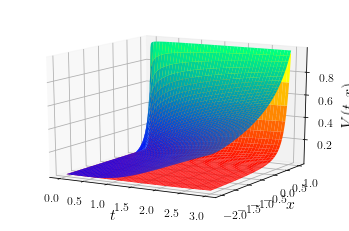

In [2]:
%matplotlib inline

T1, X1, Z1 = solve_pde(xmin=-2, xmax=1, Tmax=3, sigma=1)
TT1, XX1 = np.meshgrid(T1, X1)

T2, X2, Z2 = solve_pde(xmin=-2, xmax=1, Tmax=3, sigma=0.5)
TT2, XX2 = np.meshgrid(T2, X2)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf1 = ax.plot_surface(TT1, XX1, Z1.T, cmap=cm.winter, linewidth=0)
surf2 = ax.plot_surface(TT2, XX2, Z2.T, cmap=cm.autumn, linewidth=0)

ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$x$')
ax.set_zlabel(r'$V(t,x)$')

ax.view_init(elev=15., azim=-60)

#plt.savefig('monotone.eps', format='eps')
plt.show()

# OU Non-monotone

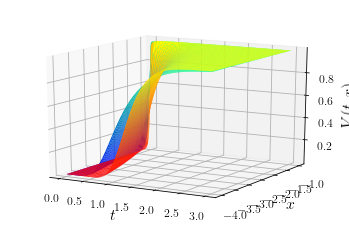

In [3]:
%matplotlib inline

T1, X1, Z1 = solve_pde(xmin=-4, xmax=-1, Tmax=3, sigma=1)
TT1, XX1 = np.meshgrid(T1, X1)

T2, X2, Z2 = solve_pde(xmin=-4, xmax=-1, Tmax=3, sigma=0.5)
TT2, XX2 = np.meshgrid(T2, X2)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf1 = ax.plot_surface(TT1, XX1, Z1.T, cmap=cm.winter, linewidth=0)
surf2 = ax.plot_surface(TT2, XX2, Z2.T, cmap=cm.autumn, linewidth=0)

ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$x$')
ax.set_zlabel(r'$V(t,x)$')

ax.view_init(elev=15., azim=-60)

#plt.savefig('non-monotone.eps', format='eps')
plt.show()

# GBM monotone

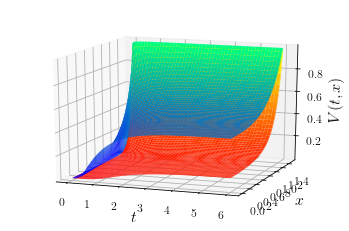

In [4]:
%matplotlib inline

T1, X1, Z1 = solve_pde(xmin=0, xmax=1.5, Tmax=6, mu=1, sigma=1, gbm=True)
TT1, XX1 = np.meshgrid(T1, X1)

T2, X2, Z2 = solve_pde(xmin=0, xmax=1.5, Tmax=6, mu=1, sigma=0.5, gbm=True)
TT2, XX2 = np.meshgrid(T2, X2)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf1 = ax.plot_surface(TT1, XX1, Z1.T, cmap=cm.winter, linewidth=0)
surf2 = ax.plot_surface(TT2, XX2, Z2.T, cmap=cm.autumn, linewidth=0)

ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$x$')
ax.set_zlabel(r'$V(t,x)$')

ax.view_init(elev=15., azim=-70)

plt.show()

# Sample paths of OU and GBM plus supremum

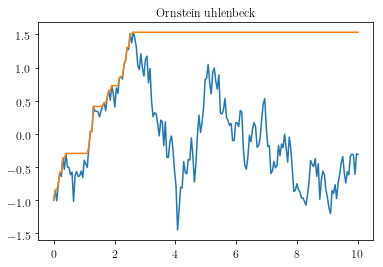

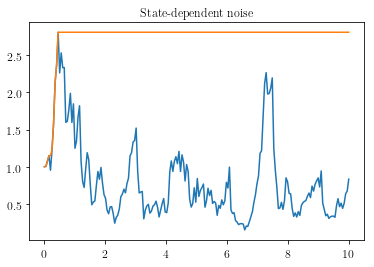

In [5]:
# OU dynamics
mu = lambda t,x: -x
sigma = lambda t,x: 1
sds = lambda t,x: 0

t = np.linspace(0, 10, 200)
x = sim_sde_milstein(mu, sigma, sds, -1, t)

sx = sup(x)

plt.plot(t, x)
plt.plot(t, sx)
plt.title("Ornstein uhlenbeck")
plt.show()

# GBP dynamics
mu = lambda t,x: (1-x)
sigma = lambda t,x: x
dsigma = lambda t,x: x

t = np.linspace(0, 10, 200)
x = sim_sde_milstein(mu, sigma, sds, 1, t)

sx = sup(x)
plt.plot(t, x)
plt.plot(t, sx)
plt.title("State-dependent noise")
plt.show()

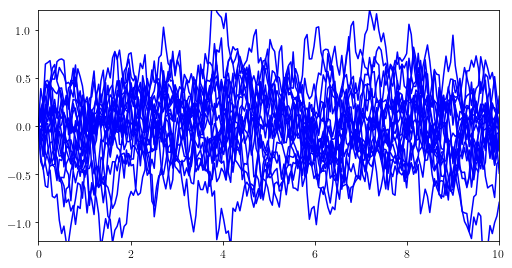

In [6]:
fig = plt.figure(figsize=(8,4))
ax = plt.Axes(fig, [0.1, 0.1,0.8, 0.8])

for n in range(20):
    t = np.linspace(0, 10, 200)
    x = sim_sde_milstein(mu=lambda t,x: -2*x, 
                         sigma=lambda t,x: 0.7, 
                         sds=lambda t,x: 0, 
                         0, 
                         t)

    ax.plot(t, x, color='blue')

# ax.set_axis_off()
ax.set_xlim(0, 10)
ax.set_ylim(-1.2, 1.2)
fig.add_axes(ax)

# plt.savefig('ou_sample_paths.pdf')
plt.show()

# Statistics of OU process

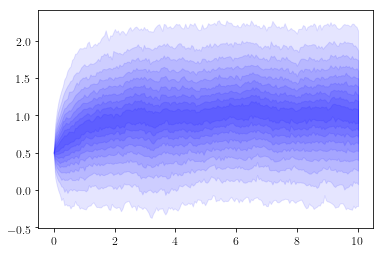

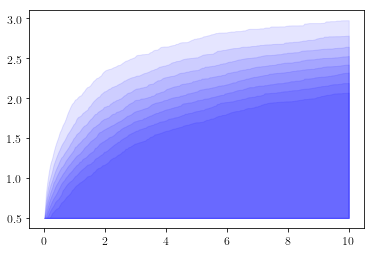

In [7]:
N = 1000
Tmax = 10
x0 = 0.5
t = np.linspace(0, Tmax, 200)

test = sim_mc(lambda t,x: 1-x,
              lambda t,x: 1,
              sds = lambda t,x: 0,
              x0=x0,
              t=t,
              num_sim=N,
              scheme='milstein')

# Plot trajectory distribution
sort = np.sort(np.array(test), axis=0)
for level in np.arange(0.95, 0.5, -0.05):
    l0 = sort[int((1-level) * sort.shape[0])]
    l1 = sort[int(level * sort.shape[0]), : ]
    plt.fill_between(t, l1, l0, color='blue', alpha=0.1)

plt.show()

# Plot supremum distribution
sup_test = np.array([sup(traj) for traj in test])

sort = np.sort(sup_test, axis=0)
for level in np.arange(0.9, 0.1, -0.1):
    l1 = sort[int(level * sort.shape[0]), : ]
    plt.fill_between(t, l1, x0, color='blue', alpha=0.1)

plt.show()

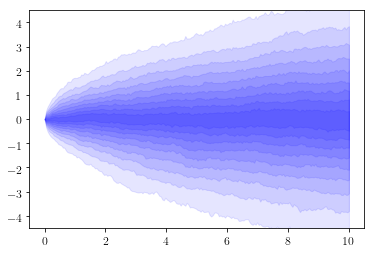

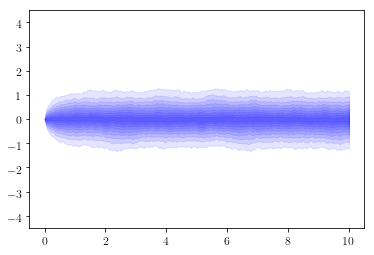

In [8]:
# OU vs BM

N = 1000
Tmax = 10
x0 = 0
t = np.linspace(0, Tmax, 200)

test = sim_mc(lambda t,x: 0,
              lambda t,x: 1,
              sds = lambda t,x: 0,
              x0=x0,
              t=t,
              num_sim=N,
              scheme='milstein')

# Plot trajectory distribution
sort = np.sort(np.array(test), axis=0)
for level in np.arange(0.95, 0.5, -0.05):
    l0 = sort[int((1-level) * sort.shape[0])]
    l1 = sort[int(level * sort.shape[0]), : ]
    plt.fill_between(t, l1, l0, color='blue', alpha=0.1)

plt.ylim([-4.5, 4.5])    
    
plt.savefig("bm_distribution.pdf")
plt.show()

test = sim_mc(lambda t,x: -x,
              lambda t,x: 1,
              sds = lambda t,x: 0,
              x0=x0,
              t=t,
              num_sim=N,
              scheme='milstein')

# Plot trajectory distribution
sort = np.sort(np.array(test), axis=0)
for level in np.arange(0.95, 0.5, -0.05):
    l0 = sort[int((1-level) * sort.shape[0])]
    l1 = sort[int(level * sort.shape[0]), : ]
    plt.fill_between(t, l1, l0, color='blue', alpha=0.1)

plt.ylim([-4.5, 4.5])    
    
plt.savefig("ou_distribution.pdf")
plt.show()

# Supremum statistics of GBM-like process

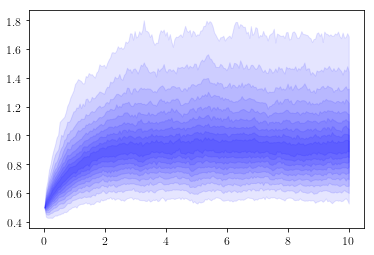

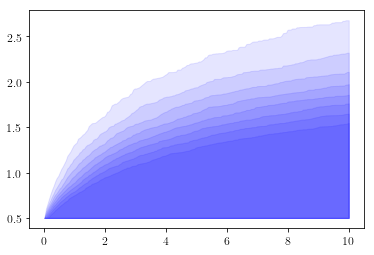

In [9]:
N = 1000
Tmax = 10
x0 = 0.5
t = np.linspace(0, Tmax, 200)

test = sim_mc(lambda t,x: (1 - x),
              lambda t,x: 0.5*x,
              sds = lambda t,x: 0.25*x,
              x0=x0,
              t=t,
              num_sim=N,
              scheme='milstein')

# Plot trajectory distribution
sort = np.sort(np.array(test), axis=0)
for level in np.arange(0.95, 0.5, -0.05):
    l0 = sort[int((1-level) * sort.shape[0])]
    l1 = sort[int(level * sort.shape[0]), : ]
    plt.fill_between(t, l1, l0, color='blue', alpha=0.1)

plt.show()

# Plot supremum distribution
sup_test = np.array([sup(traj) for traj in test])

sort = np.sort(sup_test, axis=0)
for level in np.arange(0.9, 0.1, -0.1):
    l1 = sort[int(level * sort.shape[0]), : ]
    plt.fill_between(t, l1, x0, color='blue', alpha=0.1)

plt.show()

# Distributions of BM

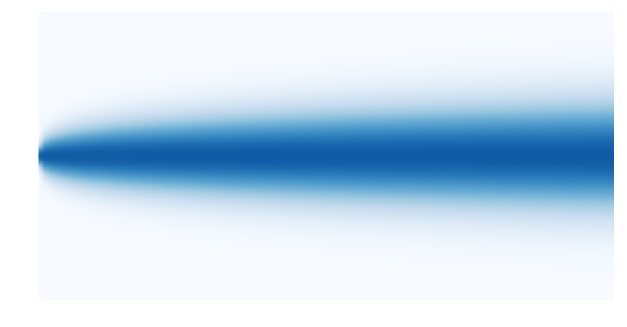

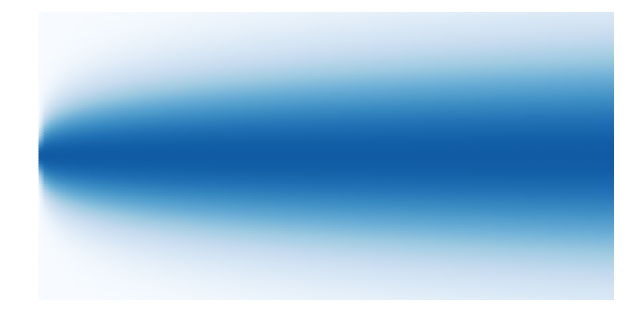

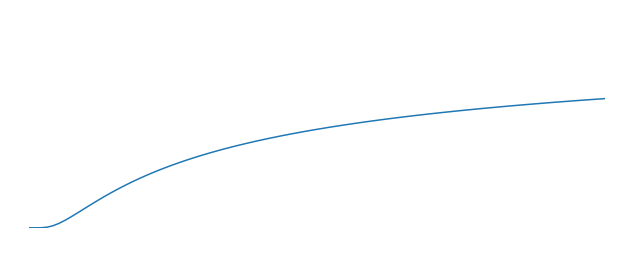

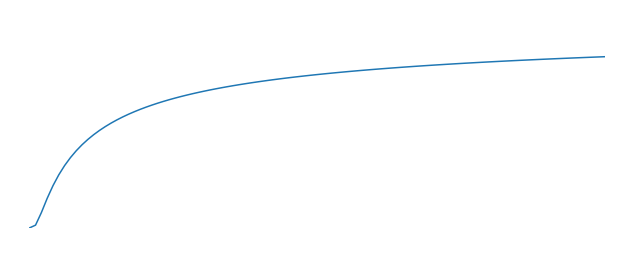

In [10]:
from scipy.special import erfc

t = np.linspace(0.01, Tmax, 100)
x = np.linspace(-2, 2, 100)
T, X = np.meshgrid(t, x)


sigma1 = 0.3
sigma2 = 0.6

Z1 = np.exp(-X**2/(2*sigma1**2*np.sqrt(T)))
Z2 = np.exp(-X**2/(2*sigma2**2*np.sqrt(T)))

E1 = erfc(0.5/np.sqrt(2*t*sigma1**2))
E2 = erfc(0.5/np.sqrt(2*t*sigma2**2))

fig = plt.figure(figsize=(8,4))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.pcolormesh(T, X, Z1, shading='gouraud', cmap=plt.cm.Blues, vmax=1.2)
ax.set_axis_off()
ax.set_xlim(0, 10)
ax.set_ylim(-2, 2)
fig.add_axes(ax)

# plt.savefig('density1.pdf', format='pdf')
plt.show()

fig = plt.figure(figsize=(8,4))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.pcolormesh(T, X, Z2, shading='gouraud', cmap=plt.cm.Blues, vmax=1.2)
ax.set_axis_off()
ax.set_xlim(0, 10)
ax.set_ylim(-2, 2)
fig.add_axes(ax)

# plt.savefig('density2.pdf', format='pdf')
plt.show()

fig = plt.figure(figsize=(8,3))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.plot(t, E1)
ax.set_axis_off()
ax.set_xlim(0, 10)
ax.set_ylim(0, 1)
fig.add_axes(ax)

# plt.savefig('cdf1.pdf', format='pdf')
# np.savetxt('cdf1.csv', np.hstack([t.reshape([-1, 1]), E1.reshape([-1, 1])]))
plt.show()

fig = plt.figure(figsize=(8,3))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.plot(t, E2)
ax.set_axis_off()
ax.set_xlim(0, 10)
ax.set_ylim(0, 1)
fig.add_axes(ax)

# plt.savefig('cdf2.pdf', format='pdf')
# np.savetxt('cdf2.csv', np.hstack([t.reshape([-1, 1]), E2.reshape([-1, 1])]))
plt.show()

# Comparison of bounds

Consider process 
$$
 \mathrm{d} X_t = - \mu X_t \mathrm{d} t + \sigma \mathrm{d} W_t,
$$ 
and the Lyapunov function $V(x) = x^2$. The dynamics of $V$ become
$$
`$$
Kushner's bound for the exit probability can therefore be written
$$
  \mathbb{P}_x \left( \sup_{0 \leq t \leq T} V_t \geq \lambda \right) \leq \frac{V(x) + \left(e^{Tc/\lambda} - 1\right) \lambda}{\lambda e^{Tc/\lambda}}
$$
for $\alpha = 2 \mu$ and $c = \sigma^2/2$. The relaxed bound used by Steinhardt and Prajna is
$$
  \mathbb{P}_x \left( \sup_{0 \leq t \leq T} V_t \geq \lambda \right) \leq \frac{V(x) + c T}{\lambda e^{Tc/\lambda}}.
$$
Here we plot these two bounds and compare them to the statistics of $V_t$, as well as the process
$$
 \mathrm{d} V_t = \left(-2 \mu V_t + \frac{\sigma^2}{2} \right) \mathrm{d} t + k \sigma \sqrt{2 V_t} \mathrm {d} W_t
$$
for different $k$.

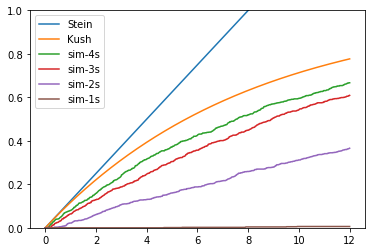

In [90]:
mu = 1.
sigma = 0.5
x0 = 0.

T = 12
limit = 1

Nx = 1000  # number of Monte Carlo sims
Nt = 1000  # number of timesteps

######################

alpha = 2 * mu
c = sigma**2/2

if not limit > c/alpha:
    print("INVALID")
    
tt = np.linspace(0, T, Nt)

V = lambda x: x**2/2
W = lambda t,v: np.exp(c*t/limit)*v + limit * (np.exp(c*T/limit) - np.exp(c*t/limit))

######################

# Analytic bounds

b_kush = (V(x0) + (np.exp(tt * c/limit) - 1)*limit) / (limit * np.exp(tt * c / limit))
b_tedr = (V(x0) + c*tt) / limit

b_kush_w = W(0,V(x0))/limit

#MC statistics
mc_data = []
for sigma_mul in [4,3,2,1]:
    test = sim_mc(lambda t,x: (-alpha*x + c),
                  lambda t,x: sigma_mul*sigma * np.sqrt(2*max(0,x)),
                  sds = lambda t,x: sigma_mul**2*sigma*2,
                  x0=x0,
                  t=tt,
                  num_sim=Nx,
                  scheme='euler')

    mc_data.append((sigma_mul, sup_statistic(test, limit)))


######################

np.savetxt("comparison.csv", np.hstack([tt.reshape([-1, 1]), 
                                        b_kush.reshape([-1, 1]), 
                                        b_tedr.reshape([-1, 1])] 
                                       + [d.reshape([-1, 1]) for _,d in mc_data]),
           delimiter=',')

fig = plt.figure()
ax = fig.gca()
ax.plot(tt, b_tedr, label="Stein")
ax.plot(tt, b_kush, label="Kush")

for (sigma_mul, data) in mc_data:
    ax.plot(tt, data, label="sim-{}s".format(sigma_mul))

ax.legend()

ax.set_ylim(0, 1)

plt.show()

# Linear example with CARE

In [33]:
import numpy as np

# Dynamics
A = np.array([[0, 1], [0, 0]])
B = np.array([[0], [1]])
F = np.array([[0], [1]])
x0 = 0.3
y0 = 0.2

# RHS in CARE
Q = np.array([[1,0], [0,1]])

# Limit to exceed
limit = 8

In [34]:
from control import care
from scipy import linalg

P, _, _ = care(A, B, Q)

eigmin_P = linalg.eigh(P, eigvals_only=1, eigvals=(0, 0))[0]
eigmax_P = linalg.eigh(P, eigvals_only=1, eigvals=(1, 1))[0]
eigmin_Q = linalg.eigh(Q, eigvals_only=1, eigvals=(0, 0))[0]

alpha = eigmin_Q / eigmax_P
c = np.trace(F.transpose() @ P @ F)/2

# Linear attempt
sigma = 2 * linalg.norm(P*F) * np.sqrt(c/alpha + limit) / np.sqrt(eigmin_P)

print('Certificate inequality V <= -{:.2f} V + {:.2f}'.format(alpha, c))
print('Noise limit dV.e(x) \leq {:.2f}'.format(sigma))

print('Limit {:.2f} and c/alpha={:.2f}'.format(limit, c/alpha))

# Quadratic attempt
L = linalg.cholesky(P)
test_val = linalg.norm(L.transpose() @ F) / c
if (test_val < 1):
    print("Quadratic inequality valid {}".format(test_val))
else:
    print("Quadratic inequality invalid with factor {}, rescaling...".format(test_val))
    
    scaling = test_val**2
    
    P_q = scaling * P
    
    eigmin_P_q = linalg.eigh(P_q, eigvals_only=1, eigvals=(0, 0))[0]
    eigmax_P_q = linalg.eigh(P_q, eigvals_only=1, eigvals=(1, 1))[0]

    alpha_q = eigmin_Q / eigmax_P_q
    c_q = np.trace(F.transpose() @ P_q @ F)/2
    
    L_new = linalg.cholesky(P_q)
    assert linalg.norm(L_new.transpose() @ F) <= c_q 
    
print('Quadratic certificate inequality V <= -{:.2f} V + {:.2f}'.format(alpha_q, c_q))
print('Quadratic limit {:.2f} and c/alpha={:.2f}'.format(limit, c_q/alpha_q))

Certificate inequality V <= -0.37 V + 0.87
Noise limit dV.e(x) \leq 15.05
Limit 8.00 and c/alpha=2.37
Quadratic inequality invalid with factor 1.240806478802799, rescaling...
Quadratic certificate inequality V <= -0.24 V + 1.33
Quadratic limit 8.00 and c/alpha=5.61


Maximal value 5.464101615137757


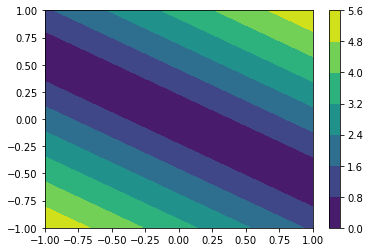

In [35]:
import matplotlib.pyplot as plt

X, Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))

V_fun = np.vectorize(lambda x,y: np.array([x,y]) @ P @ np.array([x,y]))
norm_fun = np.vectorize(lambda x,y: 2*linalg.norm(np.array([x,y]) @ P @ F))

V_val = V_fun(X, Y)
obj_val = norm_fun(X,Y)

obj_val[V_val>c/alpha+limit] = None

print("Maximal value {}".format(np.nanmax(obj_val)))

plt.contourf(X, Y, obj_val)
plt.colorbar()
plt.show()

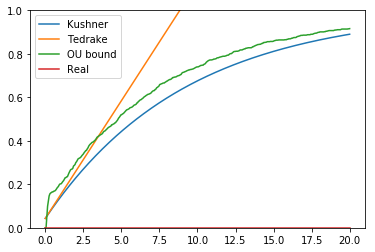

In [44]:
import sde_lib as sl
from importlib import reload  # Python 3.4+ only.

sl = reload(sl)

tt = np.linspace(0, 20, 400)

# Analytical
b_kush = (V_fun(x0, y0) + (np.exp(tt * c/limit) - 1)*limit) / (limit * np.exp(tt * c / limit))
b_tedr = (V_fun(x0, y0) + c*tt) / limit

# Empirical bound
test = sl.sim_mc(lambda t,x: -alpha_q*x + c_q,
              lambda t,x: sigma*np.sqrt(max(0, x)),
              sds = lambda t,x: 0,
              x0=V_fun([x0], [y0]),
              t=tt,
              num_sim=1000,
              scheme='milstein')
sup_data = sl.sup_statistic(test, limit)

# Empirical real
test_real = sl.sim_mc(lambda t,x: (A - 2 * B.transpose() @ P) @ x,
              lambda t,x: F.flatten(),
              sds = lambda t,x: 0,
              x0=np.array([x0, y0]),
              t=tt,
              num_sim=1000,
              scheme='euler')
P_real = [V_fun(t[:, 0], t[:, 1]) for t in test_real]
P_sup_real = sl.sup_statistic(P_real, limit)

fig = plt.figure()
ax = fig.gca()
ax.plot(tt, b_kush, label="Kushner")
ax.plot(tt, b_tedr, label="Tedrake")
ax.plot(tt, sup_data, label="OU bound")
ax.plot(tt, P_sup_real, label="Real")

ax.legend()

ax.set_ylim(0, 1)

plt.show()